# vLife Virtusa
## Usecase Description
The cancerlectin plays a key role in the process of tumor cell differentiation. Thus, to fully understand the function of cancerlectin is significant because it sheds light on the future direction for the cancer therapy.

Lectin is a kind of glycoprotein which can agglutinate cells. Lectins can bind carbohydrate reversibly and specifically recognize diverse sugar structures but are devoid of catalytic activity. In contrast to antibodies, they are not products of an immune response. However, they can mediate a variety of biological processes e.g. host-pathogen interactions, cell-cell recognition, complement activation pathways, cell cycle regulation and apoptosis etc. Cancerlectin, one kind of lectins, plays a key role in the process of tumor cells interacting with each other e.g. cell adhesion, cell growth, tumor cell differentiation, metastasis and cellular infection6–8. They can be also used as a monitor when cells become cancerous, because cancerlectins can catch the instantaneous change of the glycosylated molecule, which distributes on the cells membrane, when the cell turns cancerous.

The research of cancerlectins is helpful for understanding tumor development and tumor therapy. Therefore, it has been suggested that the accurate identification of the cancerlectins be very important to the discovery of tumor marker and cancer therapy. The traditional biochemical methods are an objective approach that could be used to recognize the cancerlectins. However, these methods are usually costly and time-consuming.

## Data Source
Data for this Usecase can be found [here](https://www.kaggle.com/umerrana/cancerlectins)

##### Important Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras.models import Sequential, model_from_json
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


### Step I. Exploratory Data Analysis

In [2]:
df = pd.read_csv("final-data.csv")
df.head()

,protein_sequence,cancerlectin
0,KIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGC,1
1,MGFPRIISKNNKIYTKLGAFCLSGDGQQFWIVCHTCQEELQTQDKF...,0
2,MRRFLFLSLGVLVVAFSLNGIGADHHCPWDWFSFDRFCYKVIKQRK...,0
3,ILNPDNSFEILVDQSVVNSGNLLNDMTPPVNPSREIEDPEDRKPED...,0
4,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...,1


Text(0.5, 1.0, 'Number of non-cancerlectin and cancerlectin')

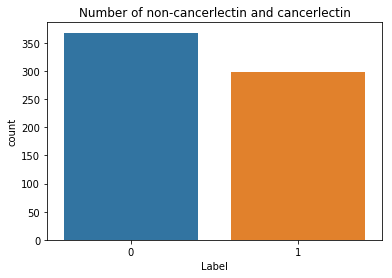

In [3]:
sns.countplot(df.cancerlectin)
plt.xlabel('Label')
plt.title('Number of non-cancerlectin and cancerlectin')

In [4]:
X = df.protein_sequence
Y = df.cancerlectin
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

#Pre-Process
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(pd.Series(X_train))
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [5]:
sequences_matrix

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   0,   5],
       [  0,   0,   0, ...,   0,   0,   6],
       ...,
       [  0,   0,   0, ...,   0,   0, 561],
       [  0,   0,   0, ...,   0,   0, 562],
       [  0,   0,   0, ...,   0,   0, 563]], dtype=int32)

### Step II. Model Building

In [6]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [7]:
model = RNN()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Fit on the training data.

In [8]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2)




Train on 452 samples, validate on 114 samples
Epoch 1/10





452/452 [==============================] - 3s 7ms/step - loss: 0.6930 - acc: 0.5354 - val_loss: 0.6919 - val_acc: 0.5263
Epoch 2/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6891 - acc: 0.5509 - val_loss: 0.6917 - val_acc: 0.5263
Epoch 3/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6859 - acc: 0.5509 - val_loss: 0.6942 - val_acc: 0.5263
Epoch 4/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6855 - acc: 0.5509 - val_loss: 0.6919 - val_acc: 0.5263
Epoch 5/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6768 - acc: 0.5509 - val_loss: 0.6918 - val_acc: 0.5263
Epoch 6/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6696 - acc: 0.5509 - val_loss: 0.6917 - val_acc: 0.5263
Epoch 7/10
452/452 [==============================] - 1s 2ms/step - loss: 0.6547 - acc: 0.5509 - val_loss: 0.6948 - val_acc: 0.5263
Epoch 8/10
452/452 [==

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

### Step III.Model Evaluation and Raw Prediction

In [26]:
df.tail(20)

,protein_sequence,cancerlectin
646,MNIFTLLFIYFLSDTVAAYCYYGTEYKNATGCFQFFRTPLNFTNAV...,0
647,MTMTSTTTKAMAMAAAVLAAAAVAATNAQTCGKQNDGMICPHNLCC...,1
648,MLTCNKAGSGMVVDAASSNGPFQPVALLHIRDVPPADQEKLFIQKL...,1
649,MSLFPSLPLLLLSMVAASYSETVTCEDAQKTCPAVIACSSPGINGF...,1
650,WSSNECNKRQHFLCKYRP,1
651,MLHPETSPGRGHLLAVLLALLGTAWAEVWPPQLQEQAPMAGALNRK...,1
652,MEESEGQKCEPNLPPSGDSRQMPQQGRSNLHVTSQEDAACRRPRER...,0
653,EDIPCSRVGHIYRKYVPYKVPAGVSLARNLKRVAEVWMDEYAEYIY...,1
654,MRFLFFLFVAVVHLFSLGSGKAIYKSGVSQRTFQEIKEEIANYEDV...,1
655,EVENRYQGNPLRGTCYYTLLIDYQFTFSLSQEDDRYYTAINFVATP...,0


In [14]:
t = ['KIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGC','MGFPRIISKNNKIYTKLGAFCLSGDGQQFWIVCHTCQEELQTQDKFWKHIQDEHNFMHGPKQEQGRTAAQAYMEAAEAAAMTPLPLYRKVSENDQQRDDVVSTEDEDMQKEPKDYTEMRAHDDQQQTAAVAIDIKLEPSSLSQQSAVQAQQQQQQQQQQQQQQQQQQQQQEQLQQQQQQQQTQQIEITTPLMYQIPQVHPPVSAYAALVQAPAINTLNMSVAAAAAAVASNQVPSTMANLLPQELQYKQELQYKQEVQQHKESTNNSTTASASSAMSSDDGERFYICDFENCGLKFKYHSRLELHRSVHSKVRRFACEICGASFKQSCNLSTHRKKKHALKGTTKATLVPSQSF']

In [15]:
temp = 0
for i in df['protein_sequence'].to_list():
    k = sequence.pad_sequences(tok.texts_to_sequences(pd.Series(i)),maxlen=150)
    predicted = model.predict(k, verbose=0)
    if predicted[0][0] > 0.5:
            res = "cancerlectin"
    else:
            res ="non-cancerlectin"
    print(temp,predicted," ",res)
    temp+=1

0 [[0.3770034]]   non-cancerlectin
1 [[0.32481292]]   non-cancerlectin
2 [[0.30366355]]   non-cancerlectin
3 [[0.4355685]]   non-cancerlectin
4 [[0.41330302]]   non-cancerlectin
5 [[0.43132406]]   non-cancerlectin
6 [[0.37135106]]   non-cancerlectin
7 [[0.5548149]]   cancerlectin
8 [[0.28489894]]   non-cancerlectin
9 [[0.556125]]   cancerlectin
10 [[0.4148076]]   non-cancerlectin
11 [[0.27816838]]   non-cancerlectin
12 [[0.31129515]]   non-cancerlectin
13 [[0.32144365]]   non-cancerlectin
14 [[0.2998634]]   non-cancerlectin
15 [[0.37150162]]   non-cancerlectin
16 [[0.33486146]]   non-cancerlectin
17 [[0.42566288]]   non-cancerlectin
18 [[0.51741207]]   cancerlectin
19 [[0.27063236]]   non-cancerlectin
20 [[0.51935655]]   cancerlectin
21 [[0.28460348]]   non-cancerlectin
22 [[0.40197465]]   non-cancerlectin
23 [[0.33262905]]   non-cancerlectin
24 [[0.56331486]]   cancerlectin
25 [[0.51908666]]   cancerlectin
26 [[0.40490648]]   non-cancerlectin
27 [[0.54820514]]   cancerlectin
28 [[0.41

227 [[0.50021785]]   cancerlectin
228 [[0.49042204]]   non-cancerlectin
229 [[0.5081812]]   cancerlectin
230 [[0.3721935]]   non-cancerlectin
231 [[0.38418332]]   non-cancerlectin
232 [[0.5543686]]   cancerlectin
233 [[0.2810118]]   non-cancerlectin
234 [[0.40498993]]   non-cancerlectin
235 [[0.43140793]]   non-cancerlectin
236 [[0.53838664]]   cancerlectin
237 [[0.5120572]]   cancerlectin
238 [[0.30505097]]   non-cancerlectin
239 [[0.33262905]]   non-cancerlectin
240 [[0.27673542]]   non-cancerlectin
241 [[0.3986141]]   non-cancerlectin
242 [[0.53635144]]   cancerlectin
243 [[0.2868247]]   non-cancerlectin
244 [[0.52702457]]   cancerlectin
245 [[0.30187628]]   non-cancerlectin
246 [[0.43181628]]   non-cancerlectin
247 [[0.312068]]   non-cancerlectin
248 [[0.41808012]]   non-cancerlectin
249 [[0.42803484]]   non-cancerlectin
250 [[0.39360672]]   non-cancerlectin
251 [[0.5248352]]   cancerlectin
252 [[0.28297]]   non-cancerlectin
253 [[0.540176]]   cancerlectin
254 [[0.33262905]]   non-

452 [[0.28727552]]   non-cancerlectin
453 [[0.29983872]]   non-cancerlectin
454 [[0.32800078]]   non-cancerlectin
455 [[0.5605377]]   cancerlectin
456 [[0.31765896]]   non-cancerlectin
457 [[0.33262905]]   non-cancerlectin
458 [[0.51333386]]   cancerlectin
459 [[0.39813155]]   non-cancerlectin
460 [[0.5661624]]   cancerlectin
461 [[0.51879704]]   cancerlectin
462 [[0.40509322]]   non-cancerlectin
463 [[0.28618822]]   non-cancerlectin
464 [[0.49018303]]   non-cancerlectin
465 [[0.39471236]]   non-cancerlectin
466 [[0.5119887]]   cancerlectin
467 [[0.31133035]]   non-cancerlectin
468 [[0.33262905]]   non-cancerlectin
469 [[0.5086331]]   cancerlectin
470 [[0.33262905]]   non-cancerlectin
471 [[0.5124037]]   cancerlectin
472 [[0.53282243]]   cancerlectin
473 [[0.5542597]]   cancerlectin
474 [[0.5230809]]   cancerlectin
475 [[0.2716262]]   non-cancerlectin
476 [[0.27976978]]   non-cancerlectin
477 [[0.2684735]]   non-cancerlectin
478 [[0.28407153]]   non-cancerlectin
479 [[0.29529357]]   no

##### Save model

In [16]:
model.save("model.h5")
print("Saved model to disk")
from keras.models import load_model
model1 = load_model('model.h5')

Saved model to disk


In [17]:
model1.predict(sequence.pad_sequences(tok.texts_to_sequences(pd.Series(t[1])),maxlen=150),verbose=0)

array([[0.32481292]], dtype=float32)

In [18]:
import pickle
with open('tok.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
test_sequences = t[0]
print(test_sequences)
model_name= "model.h5"
model_final = load_model(model_name)
print("loaded")
# loading
with open('tok.pickle', 'rb') as handle:
    tok = pickle.load(handle)
tok.fit_on_texts(test_sequences)
print("before")
print(model_final.summary())
print("after")
k = sequence.pad_sequences(tok.texts_to_sequences(pd.Series(test_sequences)),maxlen=150)
predicted = model_final.predict(k, verbose=0)

print("The propability of "+str(round(predicted[0][0] * 100,2))+" %")

KIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGC
loaded
before
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (D

## END